In [1]:
import time
start_time=time.time()

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import lmfit
from scipy import interpolate
import pickle
import bfunc

In [3]:
samples=pd.read_csv('CIresults//list.csv',header=None)
samples

,0
0,Dor
1,N604H
2,N595
3,N346
4,CarC
5,CarB
6,CarR
7,N604O
8,OrionLH
9,HX


In [4]:
CI = {}

for i in range(len(samples)):
    pickle_in = open('Results//CI' + samples[0][i] + '.pkl',"rb")
    df = pickle.load(pickle_in)
    CI[samples[0][i]] = df

SF = {}

for i in range(len(samples)):
    pickle_in = open('Results//SF' + samples[0][i] + '.pkl',"rb")
    df = pickle.load(pickle_in)
    SF[samples[0][i]] = df

In [5]:
for i in range(len(samples)):
    print(str(samples[0][i]) + ':',
          ' r0 = ' + str(np.round(SF[samples[0][i]]['r0'],4)) + ' pc,', 
         # ' m = ' + str(np.round(SF[samples[0][i]]['m'],4)) + ',',
          ' sig2 = ' + str(np.round(SF[samples[0][i]]['sig2'],4)) + ' (km/s)^2',
          ' sig = ' + str(np.round(SF[samples[0][i]]['sig2']**0.5,4)) + ' km/s')

Dor:  r0 = 3.3517 pc,  sig2 = 252.1136 (km/s)^2  sig = 15.8781 km/s
N604H:  r0 = 10.2482 pc,  sig2 = 54.6205 (km/s)^2  sig = 7.3906 km/s
N595:  r0 = 10.1457 pc,  sig2 = 44.1279 (km/s)^2  sig = 6.6429 km/s
N346:  r0 = 1.5538 pc,  sig2 = 31.8791 (km/s)^2  sig = 5.6462 km/s
CarC:  r0 = 0.5134 pc,  sig2 = 17.8872 (km/s)^2  sig = 4.2293 km/s
CarB:  r0 = 1.1286 pc,  sig2 = 64.1908 (km/s)^2  sig = 8.0119 km/s
CarR:  r0 = 0.5944 pc,  sig2 = 50.1867 (km/s)^2  sig = 7.0843 km/s
N604O:  r0 = 9.4559 pc,  sig2 = 35.2995 (km/s)^2  sig = 5.9413 km/s
OrionLH:  r0 = 0.4516 pc,  sig2 = 10.4338 (km/s)^2  sig = 3.2301 km/s
HX:  r0 = 3.9855 pc,  sig2 = 12.896 (km/s)^2  sig = 3.5911 km/s
M8:  r0 = 1.0527 pc,  sig2 = 7.5264 (km/s)^2  sig = 2.7434 km/s
M8S:  r0 = 0.7346 pc,  sig2 = 6.7113 (km/s)^2  sig = 2.5906 km/s
OrionS:  r0 = 0.0492 pc,  sig2 = 9.3755 (km/s)^2  sig = 3.0619 km/s
HV:  r0 = 3.0232 pc,  sig2 = 7.8647 (km/s)^2  sig = 2.8044 km/s


In [6]:
for i in range(len(samples)):
    print(str(samples[0][i]) + ':',
          ' r0 = ' + str(np.round(CI[samples[0][i]]['result'].params['r0'].value,4)) + ' pc,', 
          ' m = ' + str(np.round(CI[samples[0][i]]['result'].params['m'].value,4)) + ',',
          ' sig2 = ' + str(np.round(CI[samples[0][i]]['result'].params['sig2'].value,4)) + ' (km/s)^2',
          ' sig = ' + str(np.round(CI[samples[0][i]]['result'].params['sig2'].value**0.5,4)) + ' km/s')

Dor:  r0 = 4.502 pc,  m = 0.852,  sig2 = 345.1889 (km/s)^2  sig = 18.5793 km/s
N604H:  r0 = 11.283 pc,  m = 0.882,  sig2 = 78.4869 (km/s)^2  sig = 8.8593 km/s
N595:  r0 = 11.6964 pc,  m = 1.3867,  sig2 = 54.4052 (km/s)^2  sig = 7.376 km/s
N346:  r0 = 1.8765 pc,  m = 0.7981,  sig2 = 37.6048 (km/s)^2  sig = 6.1323 km/s
CarC:  r0 = 0.587 pc,  m = 1.1583,  sig2 = 18.1961 (km/s)^2  sig = 4.2657 km/s
CarB:  r0 = 1.2239 pc,  m = 1.3102,  sig2 = 54.5082 (km/s)^2  sig = 7.383 km/s
CarR:  r0 = 1.0838 pc,  m = 0.579,  sig2 = 74.7056 (km/s)^2  sig = 8.6432 km/s
N604O:  r0 = 6.5752 pc,  m = 1.1053,  sig2 = 65.8136 (km/s)^2  sig = 8.1126 km/s
OrionLH:  r0 = 0.5554 pc,  m = 1.848,  sig2 = 6.2015 (km/s)^2  sig = 2.4903 km/s
HX:  r0 = 3.7527 pc,  m = 0.9674,  sig2 = 15.5778 (km/s)^2  sig = 3.9469 km/s
M8:  r0 = 2.7226 pc,  m = 0.9581,  sig2 = 16.5567 (km/s)^2  sig = 4.069 km/s
M8S:  r0 = 4.9479 pc,  m = 1.6829,  sig2 = 38.1409 (km/s)^2  sig = 6.1758 km/s
OrionS:  r0 = 0.0903 pc,  m = 1.0734,  sig2 = 16

Orion

In [7]:
pickle_in = open('Results//SFOrionLH.pkl',"rb")
OL1 = pickle.load(pickle_in)

In [8]:
pickle_in = open('Results//SFOrionLH2.pkl',"rb")
OL2 = pickle.load(pickle_in)

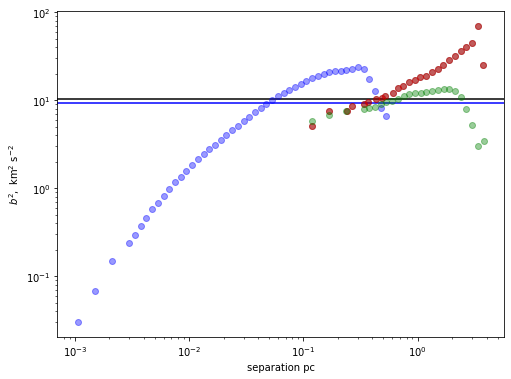

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(SF['OrionLH']['s'],SF['OrionLH']['b2'], fmt='o', alpha=0.4,color="black")
ax.errorbar(SF['OrionS']['s'],SF['OrionS']['b2'], fmt='o', alpha=0.4,color="blue")

ax.errorbar(OL1['s'],OL1['b2'], fmt='o', alpha=0.4,color="red")
ax.errorbar(OL2['s'],OL2['b2'], fmt='o', alpha=0.4,color="green")


ax.axhline(SF['OrionLH']['sig2'], ls='-',color="black")
ax.axhline(SF['OrionS']['sig2'], ls='-',color="blue")


ax.set(xscale='log', yscale='log', 
       xlabel='separation pc',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

Car

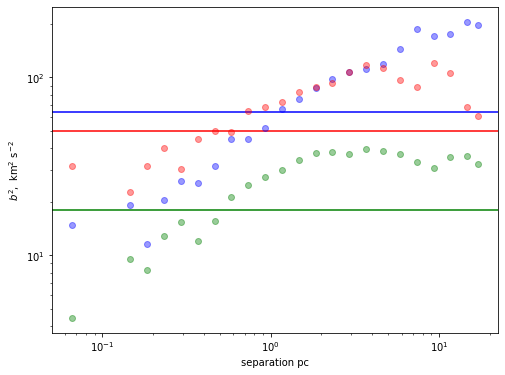

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(SF['CarC']['s'],SF['CarC']['b2'], fmt='o', alpha=0.4,color="green")
ax.errorbar(SF['CarB']['s'],SF['CarB']['b2'], fmt='o', alpha=0.4,color="blue")
ax.errorbar(SF['CarR']['s'],SF['CarR']['b2'], fmt='o', alpha=0.4,color="red")

ax.axhline(SF['CarC']['sig2'], ls='-',color="green")
ax.axhline(SF['CarB']['sig2'], ls='-',color="blue")
ax.axhline(SF['CarR']['sig2'], ls='-',color="red")

ax.set(xscale='log', yscale='log', 
       xlabel='separation pc',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

M8

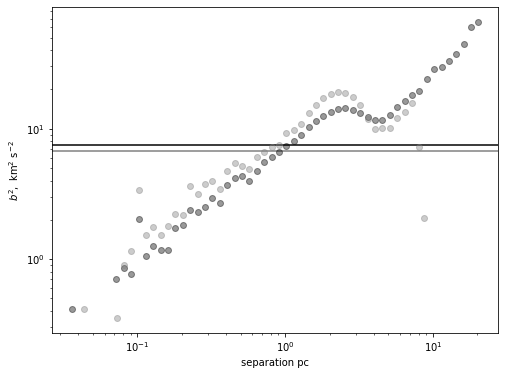

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(SF['M8']['s'],SF['M8']['b2'], fmt='o', alpha=0.4,color="black")
ax.errorbar(SF['M8S']['s'],SF['M8S']['b2'], fmt='o', alpha=0.4,color="gray")

ax.axhline(SF['M8']['sig2'], ls='-',color="black")
ax.axhline(SF['M8S']['sig2'], ls='-',color="gray")

ax.set(xscale='log', yscale='log', 
       xlabel='separation pc',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

All regions

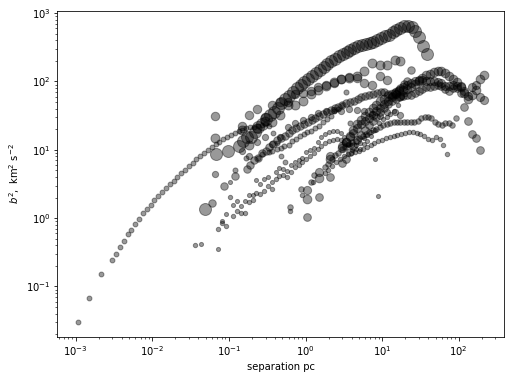

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(len(samples)):
    ax.errorbar(SF[samples[0][i]]['s'],SF[samples[0][i]]['b2'], fmt='o', alpha=0.4,color="black", markersize=5*np.log10(SF[samples[0][i]]['sig2']))

ax.set(xscale='log', yscale='log', 
       xlabel='separation pc',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

In [13]:
CIx = {}

for i in range(len(samples)):
    pickle_in = open('CIresults//' + samples[0][i] + '.pkl',"rb")
    df = pickle.load(pickle_in)
    CIx[samples[0][i]] = df

SFx = {}

for i in range(len(samples)):
    pickle_in = open('SFresults//' + samples[0][i] + '.pkl',"rb")
    df = pickle.load(pickle_in)
    SFx[samples[0][i]] = df
    

[None,
 Text(0, 0.5, '$\\sigma^2,\\ \\mathrm{km^2\\ s^{-2}}$'),
 None,
 Text(0.5, 0, 'r0, pc')]

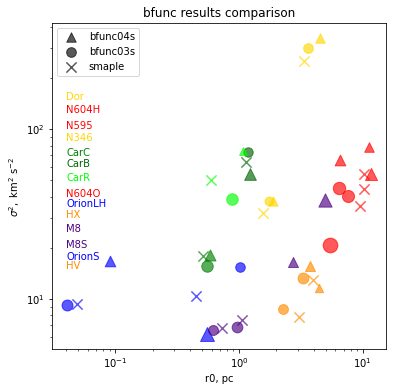

In [185]:
cycle = ['gold','red','red','gold','green','darkgreen','lime','red','blue','darkorange','indigo','indigo','blue','darkorange']
x=[150, 125, 100, 85, 70, 60 , 50, 40,35, 30, 25, 20, 17, 15]

fig, ax = plt.subplots(figsize=(6, 6))

plt.title("bfunc results comparison")

for i in range(len(samples)):
    plt.scatter(CI[samples[0][i]]['result'].params['r0'].value,CI[samples[0][i]]['result'].params['sig2'],
                color = cycle[i], s = 105*CI[samples[0][i]]['result'].params['m'].value, alpha = 0.65,marker='^',label=i)
    
    plt.scatter(CIx[samples[0][i]]['resultCI'].params['r0'].value,CIx[samples[0][i]]['resultCI'].params['sig2'],
                color = cycle[i], s = 105*CIx[samples[0][i]]['resultCI'].params['m'].value, alpha = 0.65,marker='o',)
    
    plt.scatter(SF[samples[0][i]]['r0'],SF[samples[0][i]]['sig2'],
                color = cycle[i], s = 105*1, alpha = 0.65, marker='x',)
 

plt.legend(["bfunc04s", "bfunc03s", "smaple"], loc ="best")

ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('k')
leg.legendHandles[1].set_color('k')
leg.legendHandles[2].set_color('k')

for i in range(len(samples)):
    plt.annotate(str(samples[0][i]), xy=(0.04,x[i]),color = cycle[i])
    
ax.set(xscale='log', yscale='log', 
       xlabel='r0, pc',
       ylabel=r'$\sigma^2,\ \mathrm{km^2\ s^{-2}}$'
      )

In [85]:
for i in range(len(samples)):
    print(150-(i*10))

150
140
130
120
110
100
90
80
70
60
50
40
30
20


In [16]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 5.634347438812256 seconds ---
